In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
%matplotlib inline

In [2]:
pokemon = pd.read_csv('./pokemon.csv')

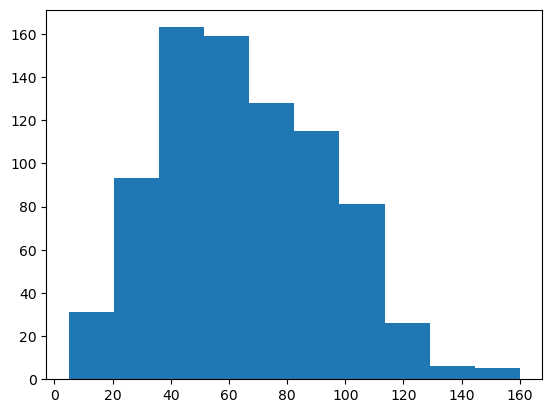

In [4]:
plt.hist(data=pokemon, x='speed');

## Example 1. Demonstrate figure.add_axes() and axes.hist()

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

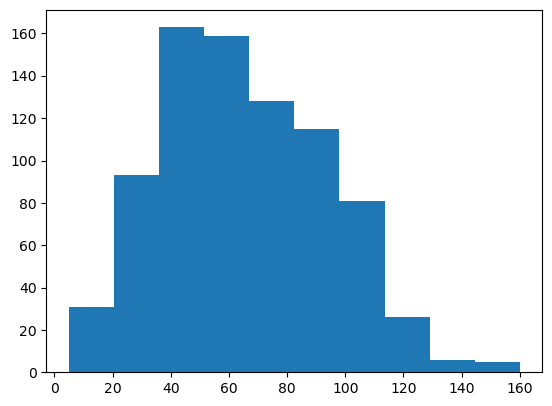

In [14]:
# Create new figure
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data=pokemon, x='speed')

## Example 2. Use axes with seaborn.countplot()

<Axes: xlabel='generation_id', ylabel='count'>

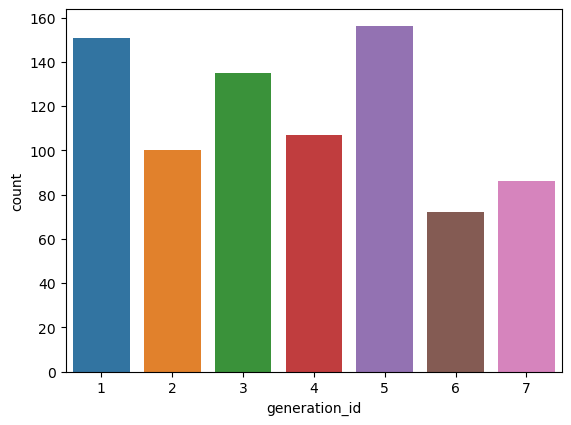

In [13]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
sb.countplot(data=pokemon, x = 'generation_id', ax=ax)

## Example 3. Sub-plots

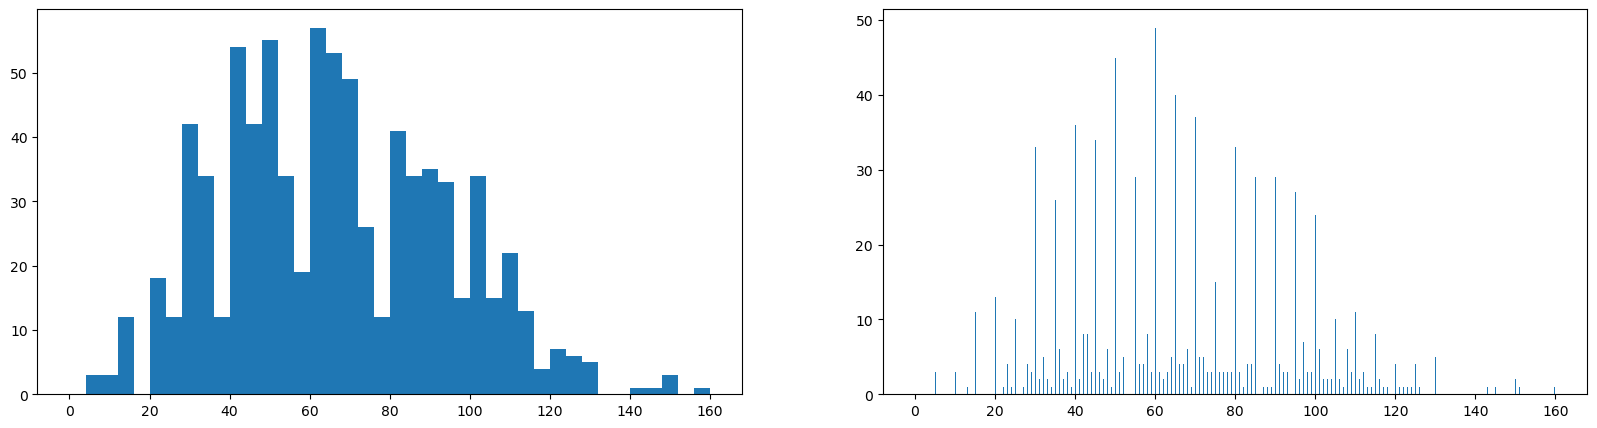

In [29]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

First of all, plt.figure(figsize = [20, 5])creates a new Figure, with the "figsize" argument setting the width and height of the overall figure to 20 inches by 5 inches, respectively. Even if we don't assign any variable to return the function's output, Python will still implicitly know that further plotting calls that need a Figure will refer to that Figure as the active one.

Then, plt.subplot(1, 2, 1) creates a new Axes in our Figure, its size determined by the subplot() function arguments. The first two arguments says to divide the figure into one row and two columns, and the third argument says to create a new Axes in the first slot. Slots are numbered from left to right in rows from top to bottom. Note in particular that the index numbers start at 1 (rather than the usual Python indexing starting from 0). (You'll see the indexing a little better in the example at the end of the page.) Again, Python will implicitly set that Axes as the current Axes, so when the plt.hist() call comes, the histogram is plotted in the left-side subplot.

Finally, plt.subplot(1, 2, 2) creates a new Axes in the second subplot slot, and sets that one as the current Axes. Thus, when the next plt.hist() call comes, the histogram gets drawn in the right-side subplot.




## Additional Techniques
To close this page, we'll quickly run through a few other ways of dealing with Axes and subplots. The techniques above should suffice for basic plot creation, but you might want to keep the following in the back of your mind as additional tools to break out as needed.

If you don't assign Axes objects as they're created, you can retrieve the current Axes using ax = plt.gca(), or you can get a list of all Axes in a Figure fig by using axes = fig.get_axes(). As for creating subplots, you can use fig.add_subplot() in the same way as plt.subplot() above. If you already know that you're going to be creating a bunch of subplots, you can use the plt.subplots() function

## Example 4. Demonstrate pyplot.sca() and pyplot.text() to generate a grid of subplots

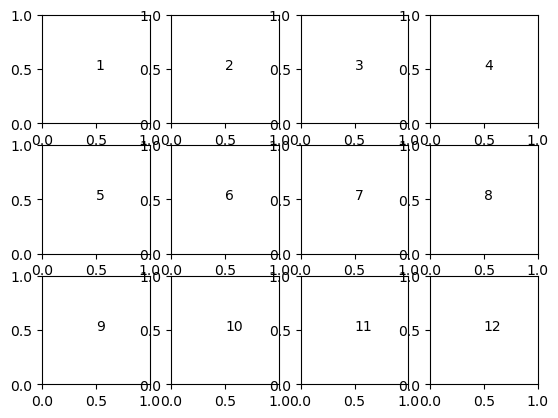

In [30]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes